# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [63]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [64]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

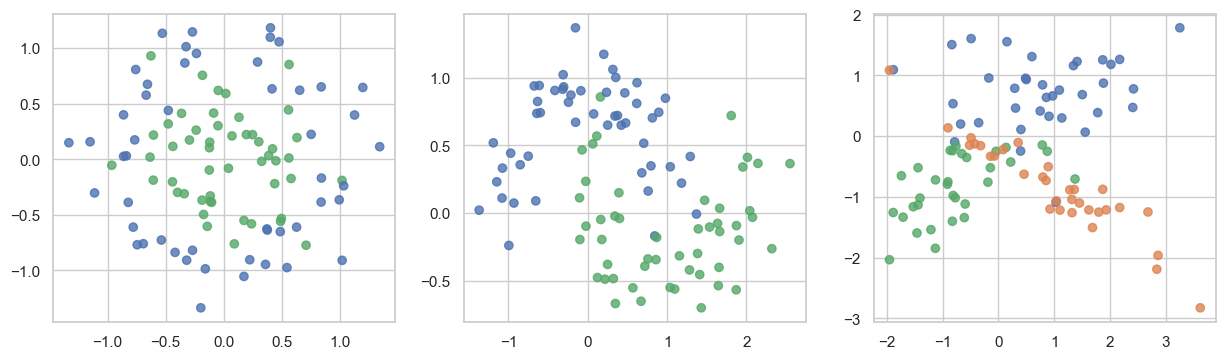

In [65]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [66]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

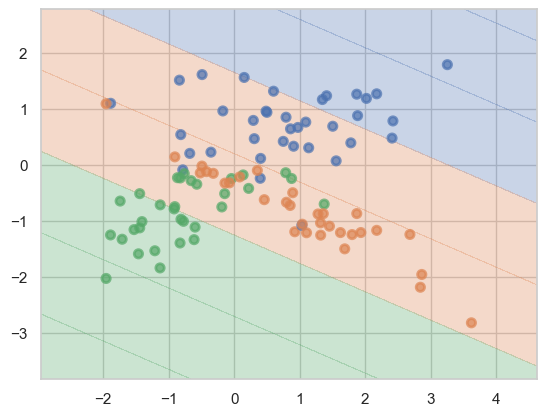

In [67]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1:
  Точность на обучающей выборке: 1.0000
  Точность на тестовой выборе: 0.7333
  Переобучение: 0.2667

Датасет 2:
  Точность на обучающей выборке: 1.0000
  Точность на тестовой выборе: 0.8667
  Переобучение: 0.1333

Датасет 3:
  Точность на обучающей выборке: 1.0000
  Точность на тестовой выборе: 0.8333
  Переобучение: 0.1667



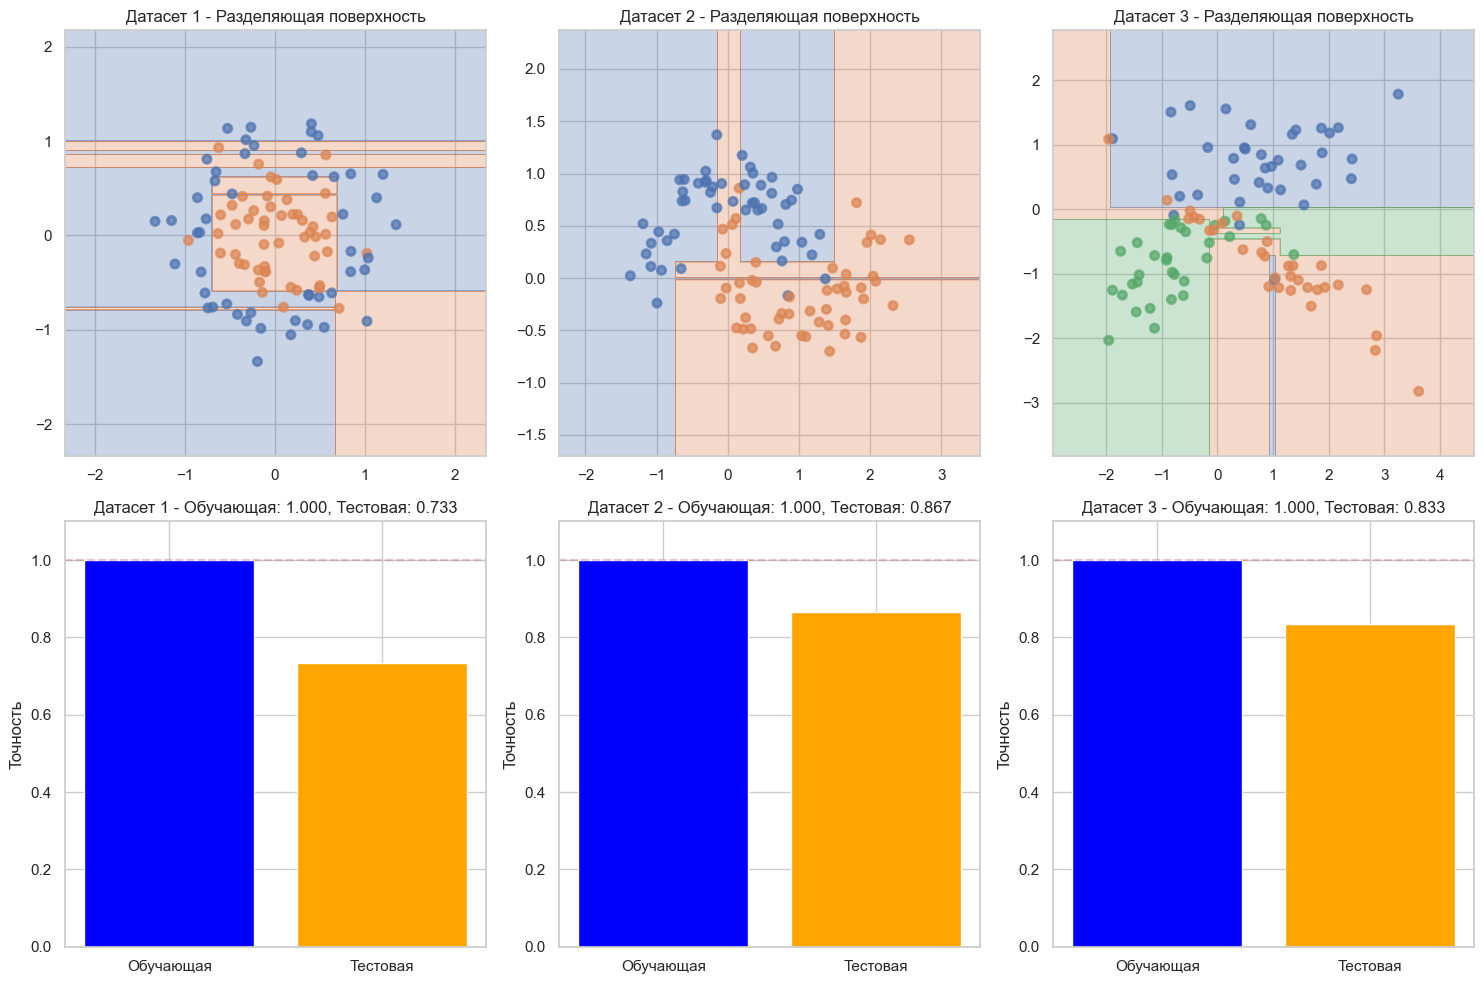

In [68]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 10))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X, y)
    plt.title(f'Датасет {i+1} - Разделяющая поверхность')
    
    plt.subplot(2, 3, i + 4)
    plt.bar(['Обучающая', 'Тестовая'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim([0, 1.1])
    plt.ylabel('Точность')
    plt.title(f'Датасет {i+1} - Обучающая: {train_acc:.3f}, Тестовая: {test_acc:.3f}')
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.3)
    
    print(f"Датасет {i+1}:")
    print(f"  Точность на обучающей выборке: {train_acc:.4f}")
    print(f"  Точность на тестовой выборе: {test_acc:.4f}")
    print(f"  Переобучение: {train_acc - test_acc:.4f}")
    print()

plt.tight_layout()
plt.show()

__Ответ:__ Да, деревья сильно переобучились.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Датасет 1
Без регуляризации    | Обучающая: 1.0000 | Тестовая: 0.7333 | Переобучение: 0.2667 | Глубина: 6
max_depth=3          | Обучающая: 0.8857 | Тестовая: 0.7333 | Переобучение: 0.1524 | Глубина: 3
max_depth=5          | Обучающая: 0.9714 | Тестовая: 0.7667 | Переобучение: 0.2048 | Глубина: 5
max_depth=10         | Обучающая: 1.0000 | Тестовая: 0.7333 | Переобучение: 0.2667 | Глубина: 6
min_samples_leaf=5   | Обучающая: 0.8714 | Тестовая: 0.9000 | Переобучение: -0.0286 | Глубина: 5
min_samples_leaf=10  | Обучающая: 0.8143 | Тестовая: 0.7667 | Переобучение: 0.0476 | Глубина: 4


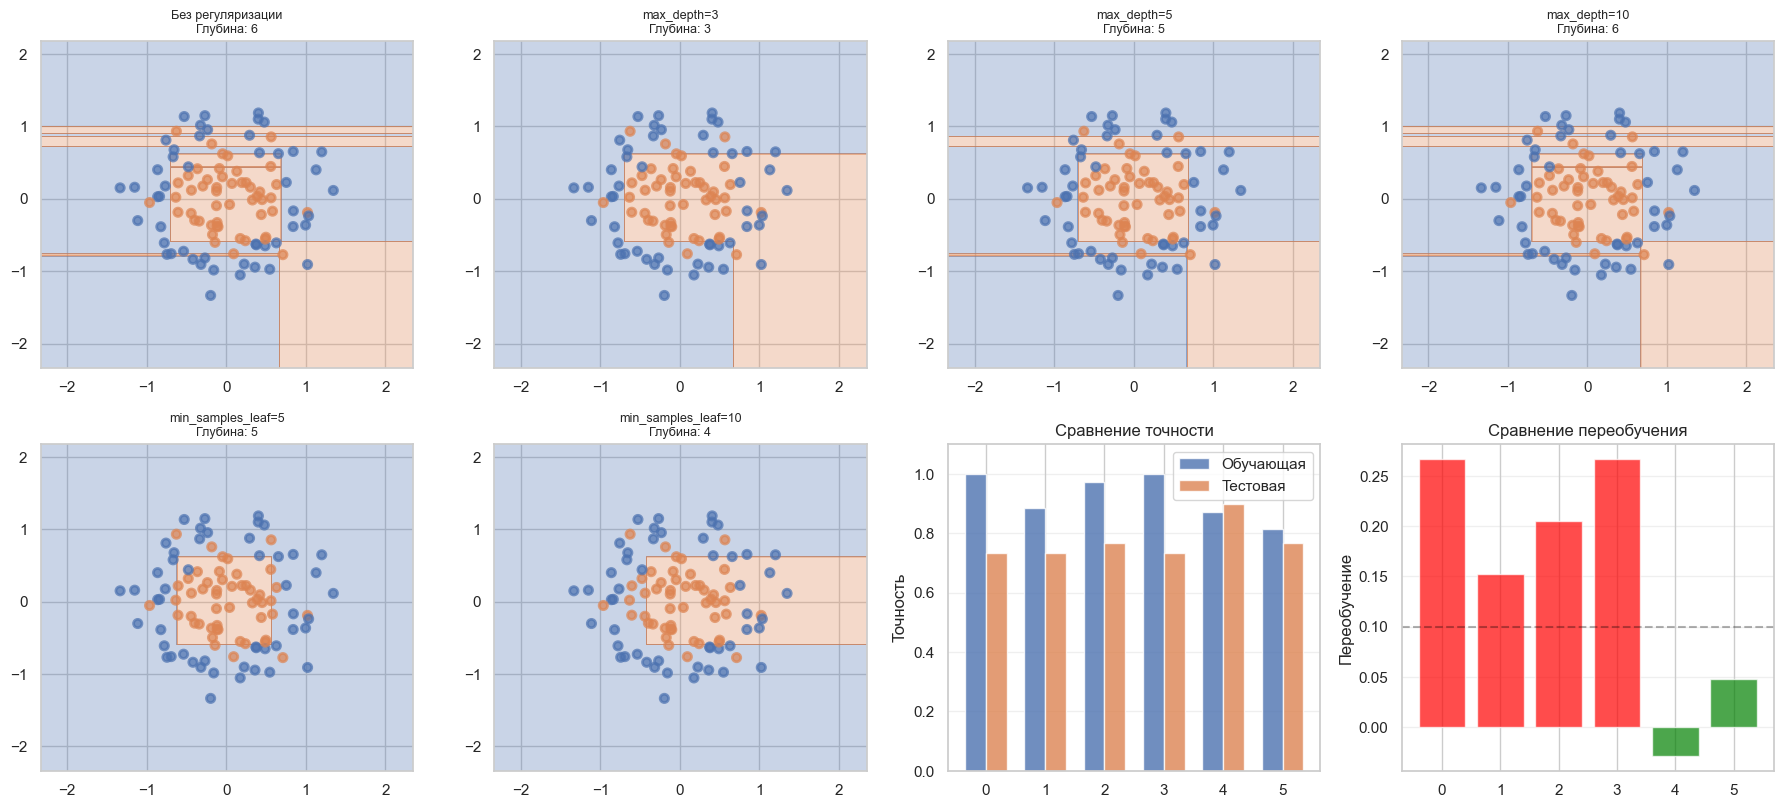


Датасет 2
Без регуляризации    | Обучающая: 1.0000 | Тестовая: 0.8667 | Переобучение: 0.1333 | Глубина: 4
max_depth=3          | Обучающая: 0.9143 | Тестовая: 0.9333 | Переобучение: -0.0190 | Глубина: 3
max_depth=5          | Обучающая: 1.0000 | Тестовая: 0.8667 | Переобучение: 0.1333 | Глубина: 4
max_depth=10         | Обучающая: 1.0000 | Тестовая: 0.8667 | Переобучение: 0.1333 | Глубина: 4
min_samples_leaf=5   | Обучающая: 0.9571 | Тестовая: 0.7333 | Переобучение: 0.2238 | Глубина: 4
min_samples_leaf=10  | Обучающая: 0.8714 | Тестовая: 0.7667 | Переобучение: 0.1048 | Глубина: 3


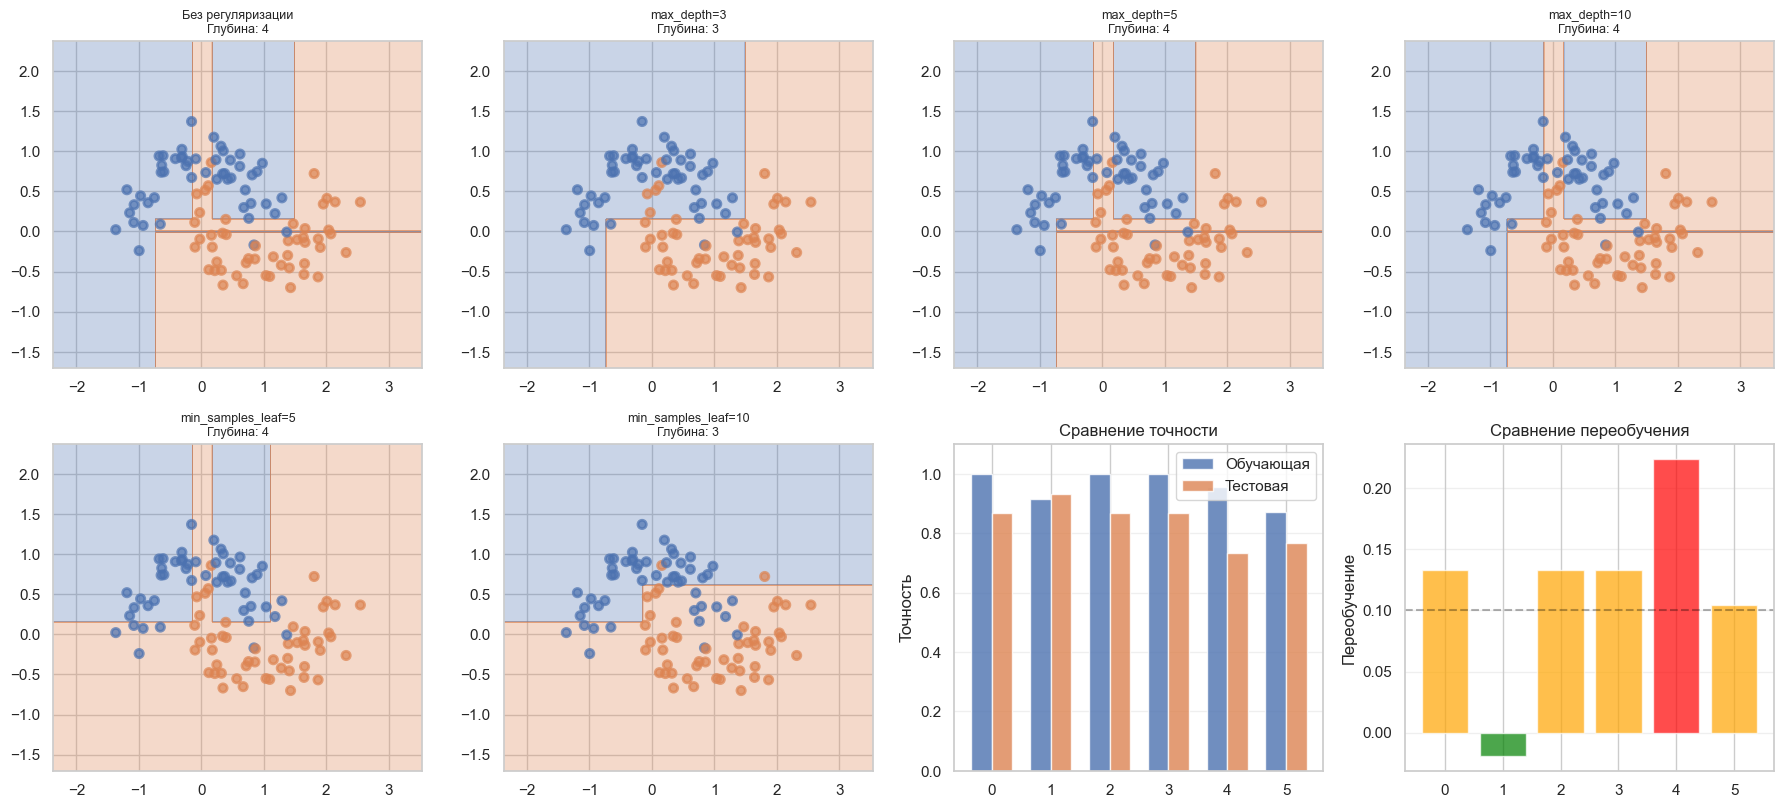


Датасет 3
Без регуляризации    | Обучающая: 1.0000 | Тестовая: 0.8333 | Переобучение: 0.1667 | Глубина: 7
max_depth=3          | Обучающая: 0.9429 | Тестовая: 0.8667 | Переобучение: 0.0762 | Глубина: 3
max_depth=5          | Обучающая: 0.9714 | Тестовая: 0.8000 | Переобучение: 0.1714 | Глубина: 5
max_depth=10         | Обучающая: 1.0000 | Тестовая: 0.8333 | Переобучение: 0.1667 | Глубина: 7
min_samples_leaf=5   | Обучающая: 0.9000 | Тестовая: 0.7000 | Переобучение: 0.2000 | Глубина: 4
min_samples_leaf=10  | Обучающая: 0.8857 | Тестовая: 0.7667 | Переобучение: 0.1190 | Глубина: 3


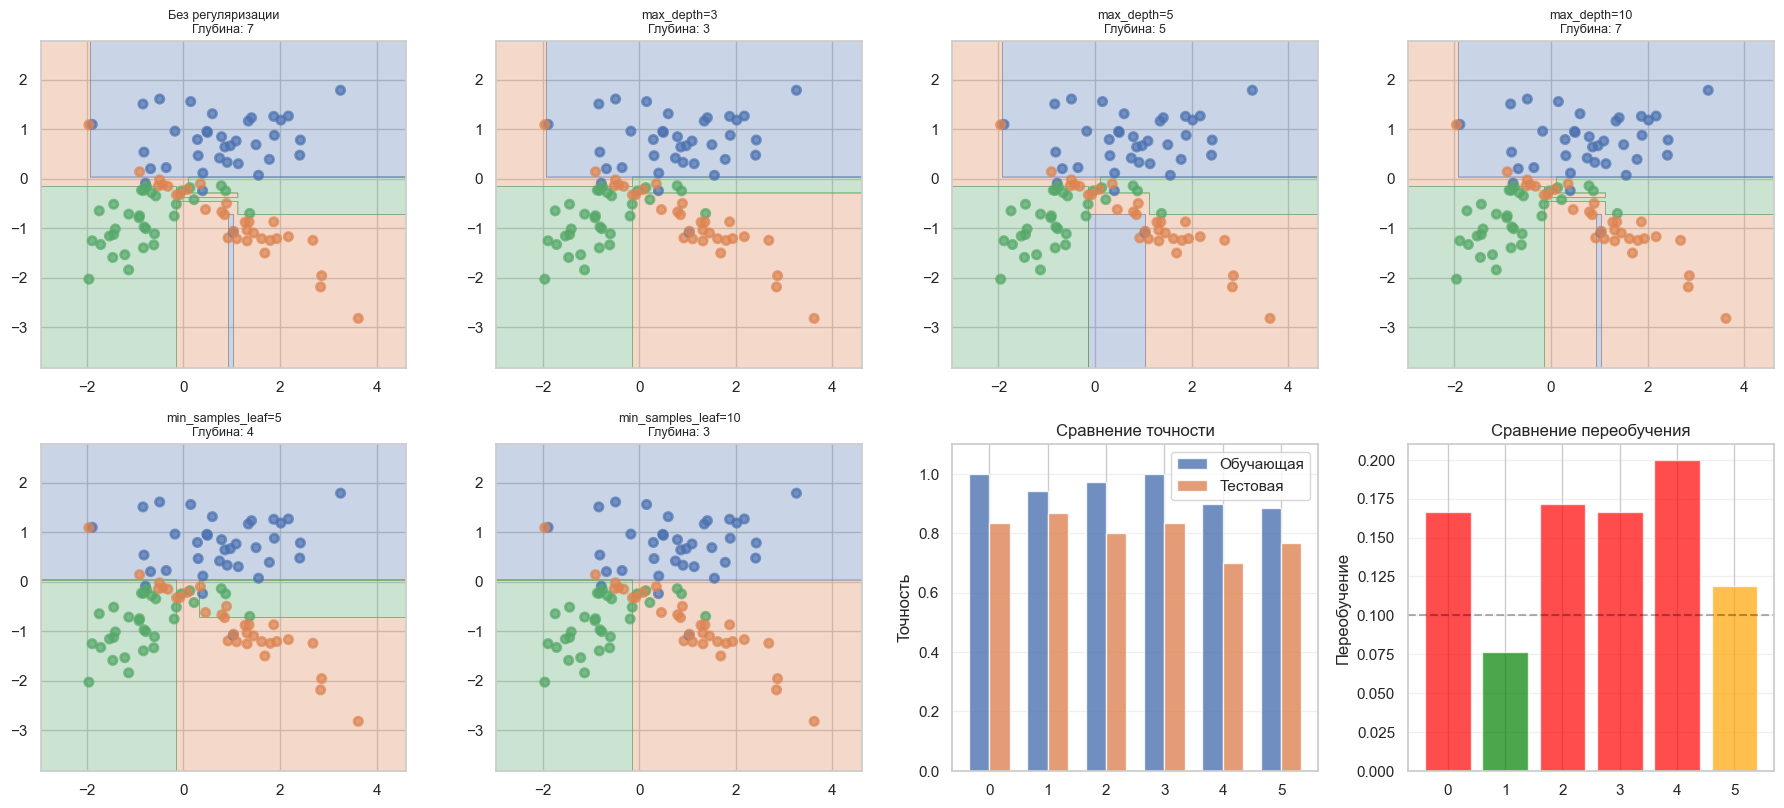

In [69]:
hyperparameters = [
    {'max_depth': None, 'min_samples_leaf': 1, 'name': 'Без регуляризации'},
    {'max_depth': 3, 'min_samples_leaf': 1, 'name': 'max_depth=3'},
    {'max_depth': 5, 'min_samples_leaf': 1, 'name': 'max_depth=5'},
    {'max_depth': 10, 'min_samples_leaf': 1, 'name': 'max_depth=10'},
    {'max_depth': None, 'min_samples_leaf': 5, 'name': 'min_samples_leaf=5'},
    {'max_depth': None, 'min_samples_leaf': 10, 'name': 'min_samples_leaf=10'},
]

for dataset_idx, (X, y) in enumerate(datasets):
    print(f"Датасет {dataset_idx + 1}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    fig = plt.figure(figsize=(18, 12))
    
    results = []
    
    for idx, params in enumerate(hyperparameters):
        clf = DecisionTreeClassifier(
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf'],
            random_state=42
        )
        clf.fit(X_train, y_train)
        
        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        overfitting = train_acc - test_acc
        
        results.append({
            'config': params['name'],
            'train_acc': train_acc,
            'test_acc': test_acc,
            'overfitting': overfitting,
            'depth': clf.get_depth()
        })
        
        plt.subplot(3, 4, idx + 1)
        plot_surface(clf, X, y)
        plt.title(f"{params['name']}\nГлубина: {clf.get_depth()}", fontsize=9)
        
        print(f"{params['name']:20s} | Обучающая: {train_acc:.4f} | Тестовая: {test_acc:.4f} | "
              f"Переобучение: {overfitting:.4f} | Глубина: {clf.get_depth()}")
    
    plt.subplot(3, 4, len(hyperparameters) + 1)
    x_pos = np.arange(len(results))
    train_accs = [r['train_acc'] for r in results]
    test_accs = [r['test_acc'] for r in results]
    
    width = 0.35
    plt.bar(x_pos - width/2, train_accs, width, label='Обучающая', alpha=0.8)
    plt.bar(x_pos + width/2, test_accs, width, label='Тестовая', alpha=0.8)
    plt.ylabel('Точность')
    plt.title('Сравнение точности')
    plt.xticks(x_pos, range(len(results)), rotation=0)
    plt.legend()
    plt.ylim([0, 1.1])
    plt.grid(axis='y', alpha=0.3)
    
    plt.subplot(3, 4, len(hyperparameters) + 2)
    overfits = [r['overfitting'] for r in results]
    colors = ['red' if o > 0.15 else 'orange' if o > 0.08 else 'green' for o in overfits]
    plt.bar(x_pos, overfits, color=colors, alpha=0.7)
    plt.ylabel('Переобучение')
    plt.title('Сравнение переобучения')
    plt.xticks(x_pos, range(len(results)), rotation=0)
    plt.axhline(y=0.1, color='black', linestyle='--', alpha=0.3, label='порог 0.1')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print()


__Ответ:__ 

Регуляризация с помощью параметров max_depth и min_samples_leaf эффективно снижает переобучение. Снижение достигается за счёт более грубых границ между классами.

Датасет с концентрическими кругами показал лучшую обучающую способность с параметром min_samples_leaf=5, несмотря на ухудшение на обучающей выборе. Датасет с полумесяцами на тестовой выборе с max_depth=3 показал результат лучше, чем на обучающей, что указывает на сильное переобучение без регуляризации. Третий датасет показал стабильное поведение засчёт более линейной структуры классов.

Датасеты ведут себя по-разному, потому что степень регуляризации зависит от сложности разделяющей границы. Датасеты с простыми границами выигрывают от сильной регуляризации, датасетами со сложными нужны более глубокие деревья.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

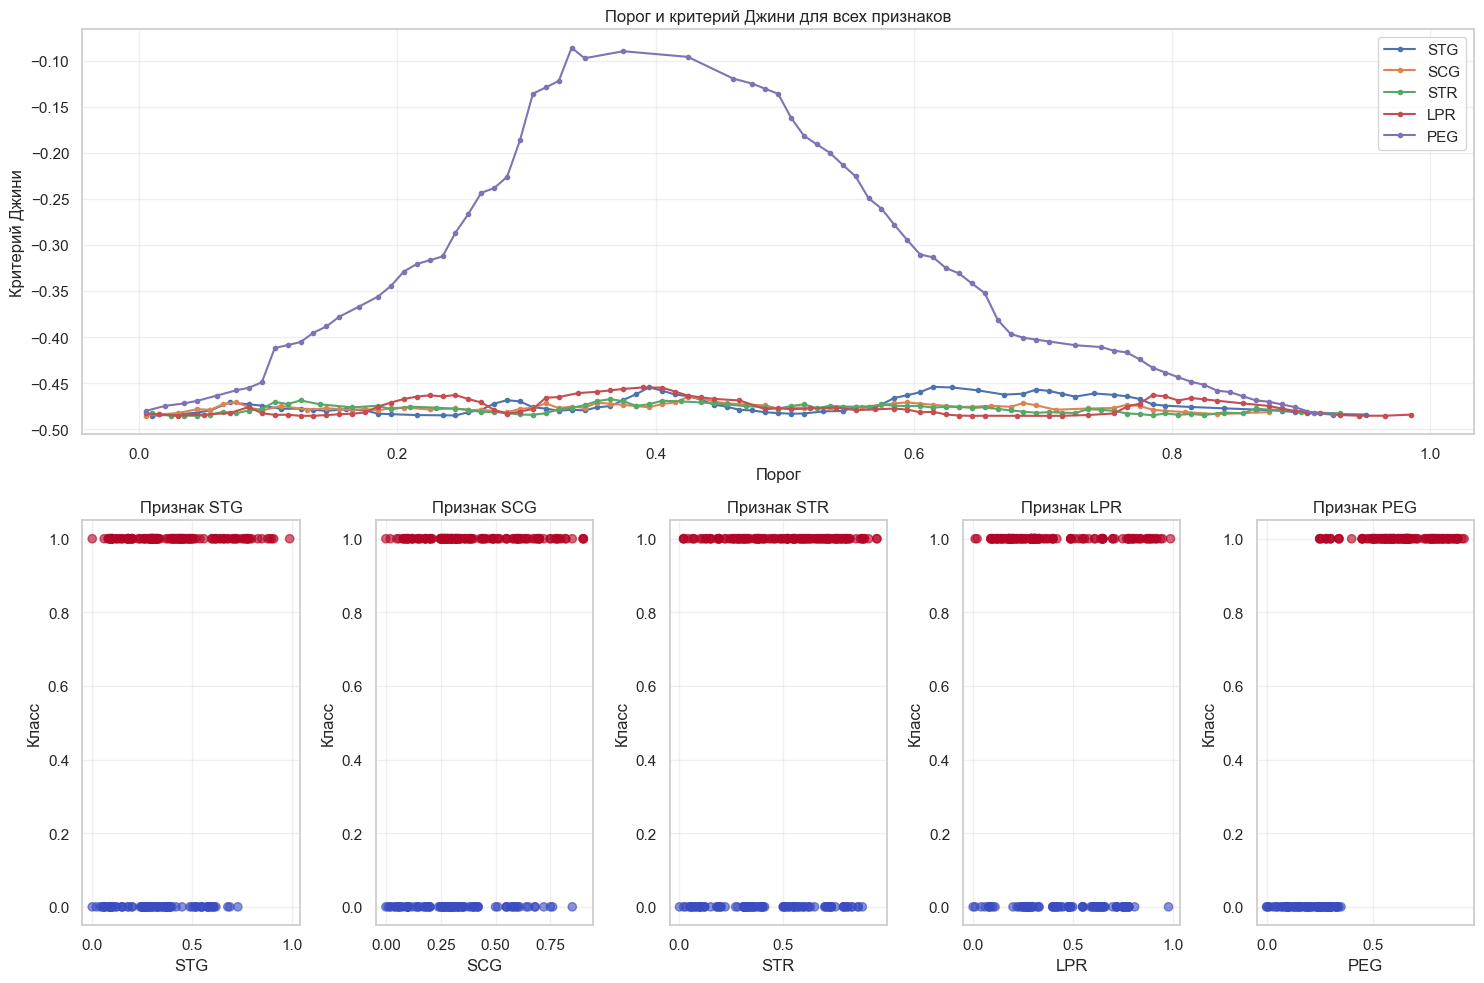

STG: порог = 0.6150, критерий Джини = -0.4540
SCG: порог = 0.4250, критерий Джини = -0.4650
STR: порог = 0.3650, критерий Джини = -0.4673
LPR: порог = 0.3900, критерий Джини = -0.4547
PEG: порог = 0.3350, критерий Джини = -0.0861


In [70]:
from hw2code import find_best_split

df = pd.read_csv('datasets/students.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
feature_names = df.columns[:-1].tolist()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    plt.plot(thresholds, ginis, marker='o', label=feature_names[i], markersize=3)

plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.title('Порог и критерий Джини для всех признаков')
plt.legend()
plt.grid(True, alpha=0.3)

for i in range(X.shape[1]):
    plt.subplot(2, 5, 6 + i)
    plt.scatter(X[:, i], y, alpha=0.6, c=y, cmap='coolwarm')
    plt.xlabel(feature_names[i])
    plt.ylabel('Класс')
    plt.title(f'Признак {feature_names[i]}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for i in range(X.shape[1]):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X[:, i], y)
    print(f"{feature_names[i]}: порог = {threshold_best:.4f}, критерий Джини = {gini_best:.4f}")


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Делить стоит по признаку PEB. Он имеет явно выраженный пик на графике около 0.4 с критерием Джини около -0.1 Остальные признаки почти не различимы на графике -- они идут вместе около -0.45.

Численные значения подтверждают это. PEG (-0.0861) значительно отличается от остальных: STR (-0.4673), SCG (-0.4650), LPR (-0.4547) и STG (-0.4540). Кривая PEG имеет явно выраженный максимум, что способствует лучшему разделению классов. Кривые остальных признаков практически плоские -- хуже разделяют классы.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [71]:
from hw2code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность на mushrooms: {acc:.4f}")

def get_tree_depth(node):
    if node["type"] == "terminal":
        return 0
    return 1 + max(get_tree_depth(node["left_child"]), get_tree_depth(node["right_child"]))

depth = get_tree_depth(tree._tree)
print(f"Глубина дерева: {depth}")


Точность на mushrooms: 1.0000
Глубина дерева: 8


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

datasets_info = {
    'mushrooms': {
        'file': 'datasets/agaricus-lepiota.data',
        'target_col': 0
    },
    'tic-tac-toe': {
        'file': 'datasets/tic-tac-toe-endgame.csv',
        'target_col': -1
    },
    'cars': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
        'target_col': -1,
        'class_map': {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
    },
    'nursery': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
        'target_col': -1,
        'class_map': {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
    }
}

results = []

for dataset_name, info in datasets_info.items():
    if 'file' in info:
        df = pd.read_csv(info['file'], header=None)
    else:
        df = pd.read_csv(info['url'], header=None)
    
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in df.columns:
        df_encoded[col] = le.fit_transform(df[col])
    
    if info['target_col'] == 0:
        X = df_encoded.iloc[:, 1:].values
        y = df_encoded.iloc[:, 0].values
    else:
        X = df_encoded.iloc[:, :-1].values
        y_raw = df.iloc[:, -1].values
        
        if 'class_map' in info:
            y = np.array([info['class_map'][val] for val in y_raw])
        else:
            y = df_encoded.iloc[:, -1].values
    
    n_features = X.shape[1]
    
    feature_types_real = ['real'] * n_features
    tree_real = DecisionTree(feature_types_real)
    scores_real = cross_val_score(tree_real, X, y, cv=10, scoring=make_scorer(accuracy_score))
    
    feature_types_cat = ['categorical'] * n_features
    tree_cat = DecisionTree(feature_types_cat)
    scores_cat = cross_val_score(tree_cat, X, y, cv=10, scoring=make_scorer(accuracy_score))
    
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    feature_types_ohe = ['real'] * X_ohe.shape[1]
    tree_ohe = DecisionTree(feature_types_ohe)
    scores_ohe = cross_val_score(tree_ohe, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score))
    
    clf_sklearn = DecisionTreeClassifier(random_state=42)
    scores_sklearn = cross_val_score(clf_sklearn, X, y, cv=10, scoring=make_scorer(accuracy_score))
    
    results.append({
        'Датасет': dataset_name,
        'Вещественный': scores_real.mean(),
        'Категориальный': scores_cat.mean(),
        'OHE': scores_ohe.mean(),
        'sklearn': scores_sklearn.mean()
    })
    
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Датасет')
print("Результаты:")
print(results_df)

Результаты:
             Вещественный  Категориальный       OHE   sklearn
Датасет                                                      
mushrooms        0.999261        1.000000  0.999631  0.960384
tic-tac-toe      0.497083        0.601250  0.574167  0.785351
cars             0.942647        0.967546  0.919495  0.942707
nursery          0.999691        0.999846  0.999537  0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** 

Алгоритмы ранжируются по-разному на разных датасетах. На mushrooms категориальный подход показывает точность лучше, чем sklean. Возможно, это связано с тем, что признаки имеют номинальную природу без естественного порядка.

На tic-tac-toe самописные алгоритмы работают хуже, чем sklearn (вероятно, из-за более оптимизированной реализации). На cars и nursery категориальный подход немного превосходит вещественный.

One-hot encoding показывает неоднозначные результаты: на mushrooms и nursery он один из лучших, на других проседает из-за увеличенной размерности и разреженности данных (выбрать оптимальное разбиение сложнее.)

Результаты содержат случайную компоненту через разбиение на фолды в кросс-валидации. Чтобы улучшить работу алгоритмов, можно добавить регуляризацию, использовать более эффективные критерии разбиения, оптимизировать работу с категориальными признаками.



Вставьте что угодно, описывающее ваши впечатления от этого задания: